# Contents 

1. Importing Libraries 
2. Data Privacy (PII)
3. Creating Regional Differences 
4. Creating Exclusion Flags
5.  Creating Customer Profiles 
    Age Group
    Income 
    Family/dependents     
    Organic Shopper Profile
6. Aggregating max, mean, and min variables of customer profiles 
7. Visuals for comparison



# Importing libraries 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/alejandrosalgado/Desktop/Instacart Basket Analysis'

In [4]:
# combined dataframe 
df = pd.read_pickle(r'/Users/alejandrosalgado/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/df_merged_final_1.pkl')

In [5]:
df.shape

(32404859, 35)

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   new_customer                   bool    
 7   product_id                     int64   
 8   add_to_cart_order              int64   
 9   reordered                      int64   
 10  Unnamed: 0_y                   int64   
 11  product_name                   object  
 12  aisle_id                       int64   
 13  department_id                  int64   
 14  prices                         float64 
 15  _merge                         category
 16  price_range_loc                object  
 17  busiest_day              

In [8]:
df.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,no_of_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,2.560037e+04,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,1.408555e+04,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,2.530300e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# Data Privacy (PII)

In [9]:
# adressing PII by dropping names 
df= df.drop(columns=['first_name', 'last_name'])

In [10]:
#checking columns 
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_since_prior_order', 'Frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income'],
      dtype='object')

# Creating Regional Differences 

In [11]:
#create a region columm and this is based off the state column 
result= []

for value in df['state']:
    if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('North East')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')

In [12]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [13]:
df['region']=result

In [14]:
#check frequency
df['region'].value_counts()

South         10791885
West           8292913
Midwest        7597325
North East     5722736
Name: region, dtype: int64

Looks like the south region has the most sales.

In [15]:
df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,median_days_since_prior_order,Frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,6,2,7,19.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,7,1,9,20.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,8,1,14,14.0,False,196,2,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,9,1,16,0.0,False,196,4,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,10,4,8,30.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [16]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_since_prior_order', 'Frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income', 'region'],
      dtype='object')

In [17]:
# analyzing regional spending differences with crosstab
crosstab= pd.crosstab(df['region'], df['spending_flag'], dropna=False)

In [18]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
North East,108225,5614511
South,209691,10582194
West,160354,8132559


Both high and low spenders are highest in the south 

# Creating Exclusion Flags

In [19]:
# creating exclusion flag
df.loc[df['max_order']<5, 'activity']= 'low_activity'
df.loc[df['max_order']>=5, 'activity']= 'active'

In [20]:
# checking frequency 
df['activity'].value_counts(dropna=False)

active          30964564
low_activity     1440295
Name: activity, dtype: int64

In [21]:
#create a dataset of customers with orders above 5
df_active= df[df['activity']== 'active']

In [22]:
#create a dataset of customers with orders lower than 5
df_low_activity= df[df['activity']== 'low_activity']

In [23]:
df_low_activity 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity
1510,520620,120,1,3,11,NaN,True,196,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1511,3273029,120,3,2,8,19.0,False,196,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1512,520620,120,1,3,11,NaN,True,46149,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1513,3273029,120,3,2,8,19.0,False,46149,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1514,520620,120,1,3,11,NaN,True,26348,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,1947537,166751,3,4,7,0.0,False,49001,1,1,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West,low_activity
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity


In [24]:
df_active

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404851,2988973,106143,23,2,22,5.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404852,930,106143,24,6,12,4.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404853,467253,106143,25,6,16,7.0,False,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active


In [25]:
# exporting active customer dataset 
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [29]:
# exporting low activity customer dataset 
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

# Creating Customer profiles 

Age Group

In [30]:
# creating age group flag
df_active.loc[df_active['age'] <= 30, 'age_group_flag'] = 'Young Adult'
df_active.loc[(df_active['age'] > 30) & (df_active['age'] < 65), 'age_group_flag'] = 'Adult'
df_active.loc[df_active['age'] > 65, 'age_group_flag'] = 'Senior'

In [31]:
df_active['age_group_flag'].value_counts()

Adult          16464780
Senior          7730834
Young Adult     6304240
Name: age_group_flag, dtype: int64

Income 

In [121]:
#create an income flag
df_active.loc[df_active['income']<=55000, 'income_group_flag']= 'Lower Class'
df_active.loc[(df_active['income']>55000) & (df_active['income']<=155000), 'income_group_flag']= 'Middle Class'
df_active.loc[df_active['income']>155000, 'income_group_flag']= 'Upper Class'

SyntaxError: EOL while scanning string literal (3947539033.py, line 4)

In [33]:
df_active['income_group_flag'].value_counts()

Middle Class    23488182
Lower Class      4452388
Upper Class      3023994
Name: income_group_flag, dtype: int64

Family/dependents 

In [78]:
# creating family flag where 1 = family with kids and 0 = no kids 
df_active.loc[df_active['no_of_dependents'] > 0, 'family_flag'] = 1
df_active.loc[df_active['no_of_dependents'] == 0, 'family_flag'] = 0

In [35]:
df_active['family_flag'].value_counts()

1.0    23224883
0.0     7739681
Name: family_flag, dtype: int64

Organic shopper

In [76]:
df_active.loc[df_active['product_name'].str.contains('Organic', case=False), 'organic_product']= 'Organic'

In [37]:
df_active['organic_product']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
32404850    Organic
32404851    Organic
32404852    Organic
32404853    Organic
32404854    Organic
Name: organic_product, Length: 30964564, dtype: object

In [77]:
# creating organic shopper flag
df_active.loc[df_active['product_name'] <= 'Organic', 'organic_shopper_flag'] = 'Organic Shopper'
df_active.loc[df_active['product_name'] >= 'NaN', 'organic_shopper_flag'] = 'Not an Organic Shopper'

In [39]:
df_active['organic_shopper_flag'].value_counts()

Not an Organic Shopper    18120450
Organic Shopper           12844114
Name: organic_shopper_flag, dtype: int64

Visuals for customer profiles 

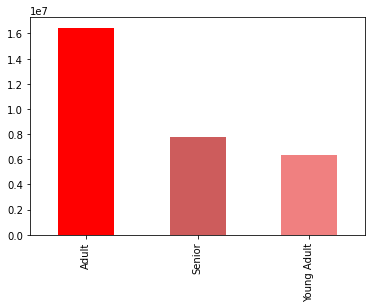

In [40]:
# age group bar chart
age_bar = df_active['age_group_flag'].value_counts().plot.bar(color = ['red', 'indianred', 'lightcoral'])

In [41]:
# export age bar
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

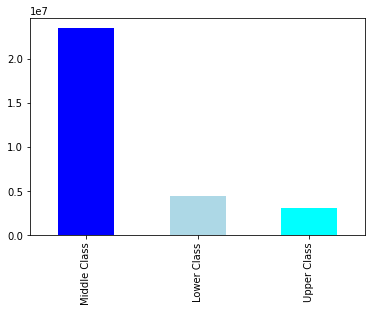

In [42]:
# income bar chart
income_bar = df_active['income_group_flag'].value_counts().plot.bar(color = ['blue', 'lightblue', 'aqua'])

In [43]:
# export income bar
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_bar.png'))

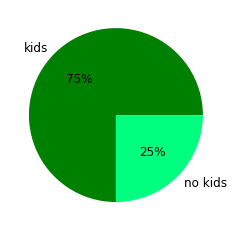

In [44]:
# family pie chart
family_pie = df_active['family_flag'].value_counts().plot.pie(label='', labels=['kids', 'no kids'],autopct=('%1.f%%'), colors= ['green','springgreen'], textprops={'fontsize': 12})

In [45]:
# export family pie
family_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_pie.png'))

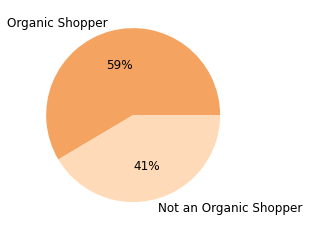

In [46]:
# organic shopper pie chart
organic_shopper = df_active['organic_shopper_flag'].value_counts().plot.pie(label='', labels=['Organic Shopper', 'Not an Organic Shopper'],autopct=('%1.f%%'), colors=['sandybrown','peachpuff'], textprops={'fontsize': 12})

In [47]:
# export organic shopper pie
organic_shopper.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'organic_shopper_pie.png'))

# Aggregating max, mean, and min variables of customer profiles 

In [48]:
# age group flag and expenditure
df_active.groupby('age_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
age_group_flag                         
Adult           11.963870  1.0  99999.0
Senior          11.828109  1.0  99999.0
Young Adult     12.082739  1.0  99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

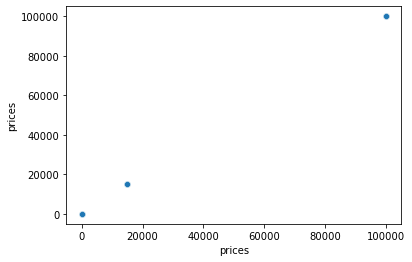

In [49]:
# checking price in scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = df_active)

In [50]:
df_active.loc[df_active['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,no_of_dependents,marital_status,income,region,activity,age_group_flag,income_group_flag,family_flag,organic_product,organic_shopper_flag
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,0,divorced/widowed,177864,North East,active,Senior,Upper Class,0.0,NaN,Organic Shopper
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,0,divorced/widowed,177864,North East,active,Senior,Upper Class,0.0,NaN,Organic Shopper
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,2,married,230074,West,active,Adult,Upper Class,1.0,NaN,Organic Shopper
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,2,married,233776,West,active,Senior,Upper Class,1.0,NaN,Organic Shopper
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,3,married,182933,South,active,Adult,Upper Class,1.0,NaN,Organic Shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303797,3138833,51346,1,6,4,NaN,True,33664,1,0,...,1,married,207497,North East,active,Adult,Upper Class,1.0,NaN,Organic Shopper
32303798,1275440,51346,3,2,7,11.0,False,33664,5,1,...,1,married,207497,North East,active,Adult,Upper Class,1.0,NaN,Organic Shopper
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,...,1,married,207497,North East,active,Adult,Upper Class,1.0,NaN,Organic Shopper
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,...,0,single,86490,North East,active,Adult,Middle Class,0.0,NaN,Organic Shopper


In [51]:
df_active.loc[df_active['prices'] >100, 'prices'] = np.nan

In [52]:
df_active['prices'].max()

25.0

In [53]:
# age group flag and expenditure part 2
df_active.groupby('age_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
age_group_flag                     
Adult           7.791061  1.0  25.0
Senior          7.794342  1.0  25.0
Young Adult     7.781398  1.0  25.0

In [54]:
# income group and expenditure
df_active.groupby('income_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
income_group_flag                     
Lower Class        6.915685  1.0  25.0
Middle Class       7.937384  1.0  25.0
Upper Class        7.938810  1.0  25.0

In [55]:
# family group
df_active.groupby('family_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
family_flag                     
0.0          7.789550  1.0  25.0
1.0          7.790937  1.0  25.0

In [56]:
# organic shopper flag and expenditure
df_active.groupby('organic_shopper_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                            mean  min   max
organic_shopper_flag                       
Not an Organic Shopper  7.487450  1.0  25.0
Organic Shopper         8.218423  1.0  25.0

# Comparing customer profiles with regions and departments 

In [57]:
# creating crosstab for age group and region
age_group_crosstab = pd.crosstab(df_active['age_group_flag'], df_active['region'], dropna = False)

In [58]:
age_group_crosstab

region,Midwest,North East,South,West
age_group_flag,,,,
Adult,3896420,2868402,5475776,4224182
Senior,1799606,1394490,2549034,1987704
Young Adult,1461047,1111476,2126902,1604815


In [59]:
# creating crosstab for income group and region
income_group_crosstab = pd.crosstab(df_active['income_group_flag'], df_active['region'], dropna = False)

In [60]:
income_group_crosstab

region,Midwest,North East,South,West
income_group_flag,,,,
Lower Class,1025408,789479,1509183,1128318
Middle Class,5526580,4158789,7791136,6011677
Upper Class,709525,516417,1010820,787232


In [61]:
# creating crosstab for family flag and region
family_flag_crosstab = pd.crosstab(df_active['family_flag'], df_active['region'], dropna = False)

In [62]:
family_flag_crosstab

region,Midwest,North East,South,West
family_flag,,,,
0.0,1822816,1354482,2581933,1980450
1.0,5438697,4110203,7729206,5946777


In [63]:
# creating crosstab for organic shopper flag and region
organic_shopper_flag_crosstab = pd.crosstab(df_active['organic_shopper_flag'], df_active['region'], dropna = False)

In [64]:
organic_shopper_flag_crosstab

region,Midwest,North East,South,West
organic_shopper_flag,,,,
Not an Organic Shopper,4237128,3202051,6036567,4644704
Organic Shopper,3024385,2262634,4274572,3282523


# Visuals for comparison

In [65]:
# creating crosstab for age group by region
age_region_bar = pd.crosstab(df_active['region'], columns = df_active['age_group_flag'])

# creating cross tab to display labels
age_region_bar_labels = pd.crosstab(df_active['region'], columns = df_active['age_group_flag'])

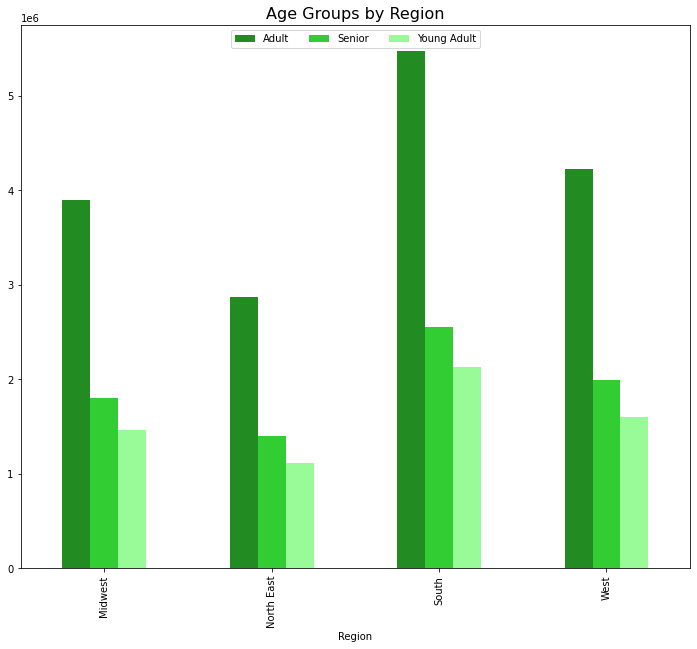

In [66]:
# creating bar chart for age group and region
age_region_bar = age_region_bar.plot(kind ='bar', stacked = False, color = ['forestgreen','limegreen','palegreen'], figsize = (12,10))
plt.title('Age Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [67]:
# exporting age group by region bar chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [94]:
# creating crosstab for income group by region
income_region_bar = pd.crosstab(df_active['region'], columns = df_active['income_group_flag'])

# creating cross tab to display labels
income_region_bar_labels = pd.crosstab(df_active['region'], columns = df_active['income_group_flag'])

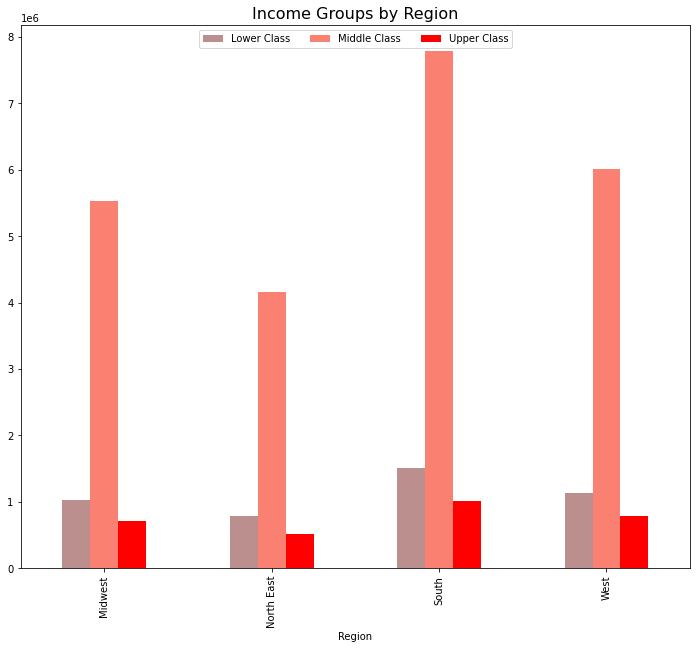

In [95]:
# creating bar chart for income group and region
income_region_bar = income_region_bar.plot(kind ='bar', stacked = False, color = ['rosybrown','salmon','red'], figsize = (12,10)),
plt.title('Income Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [83]:
# creating crosstab for family group by region
family_region_bar = pd.crosstab(df_active['region'], columns = df_active['family_flag'])

# creating cross tab to display labels
family_region_bar_labels = pd.crosstab(df_active['region'], columns = df_active['family_flag'])

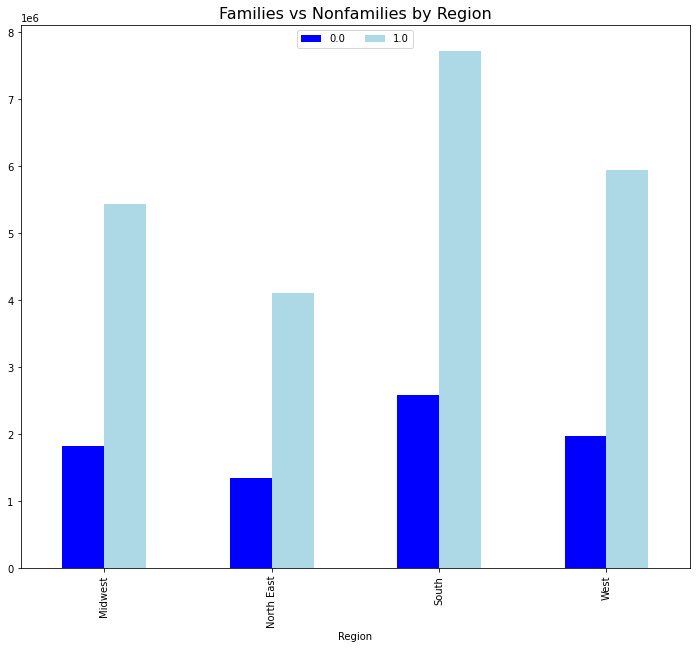

In [84]:
# creating bar chart for family group and region
family_region_bar = family_region_bar.plot(kind ='bar', stacked = False, color = ['blue','lightblue'], figsize = (12,10))
plt.title('Families vs Nonfamilies by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [85]:
# exporting family by region bar chart
family_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_region_bar.png'))

In [90]:
# creating crosstab for organic shopper group by region
organic_shopper_region_bar = pd.crosstab(df_active['region'], columns = df_active['organic_shopper_flag'])

# creating cross tab to display labels
organic_shopper_region_bar_labels = pd.crosstab(df_active['region'], columns = df_active['organic_shopper_flag'])

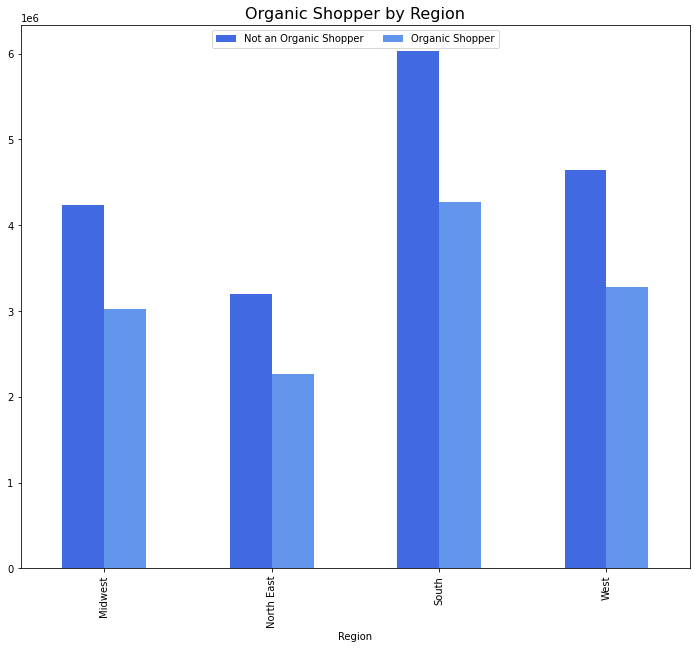

In [91]:
# creating bar chart for organic shopper group and region
organic_shopper_region_bar = organic_shopper_region_bar.plot(kind ='bar', stacked = False, color = ['royalblue','cornflowerblue'], figsize = (12,10))
plt.title('Organic Shopper by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [92]:
# exporting organic shopper group by region bar chart
organic_shopper_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'organic_shopper_region_bar.png'))

In [99]:
# import department csv for dept visual
df_dept= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [100]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [101]:
#rename unnamed column to department_id
df_dept.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace= True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


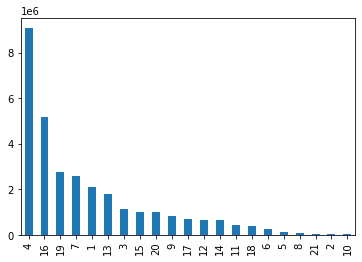

In [104]:
department_bar = df_active['department_id'].value_counts().plot.bar()

In [111]:
#turn df_dept into data dictionary
zipped= zip(df_dept['department_id'], df_dept['department'])
data_dict= dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [116]:
#mapping department names to department id in dataframe
df_active['department']= df_active['department_id'].map(data_dict)

/var/folders/wk/r4fv1r8s1kz3ksnb_nsqv6bc0000gn/T/ipykernel_51635/912956839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['department']= df_active['department_id'].map(data_dict)


In [117]:
df_active['department']

0           beverages
1           beverages
2           beverages
3           beverages
4           beverages
              ...    
32404850    beverages
32404851    beverages
32404852    beverages
32404853    beverages
32404854    beverages
Name: department, Length: 30964564, dtype: object

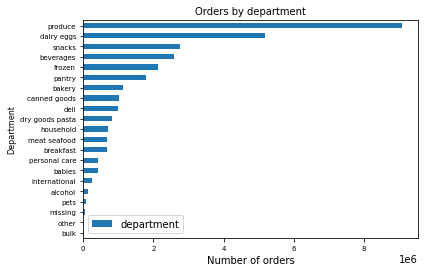

In [130]:
# Number of orders across departments
bar_department_orders=df_active['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(colormap='tab10', fontsize=7)
plt.title('Orders by department', fontsize=10)
plt.xlabel('Number of orders', fontsize=10)
plt.ylabel('Department', fontsize=8)
plt.legend(fontsize=10)

In [131]:
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [122]:
df.shape

(32404859, 35)